<a href="https://colab.research.google.com/github/Pontibesties/Proyecto-Big-Data/blob/main/Proyecto1_ProcesamientoDatos_ExploracionDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <span style="color:red">

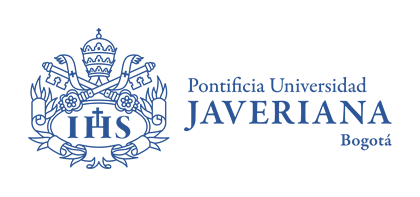
</center>

<font color='#3d67ff' size=30> <center>
**Procesamiento de Datos a Gran Escala**
Exploración de los Datos
</center></font>

<font color='#00000' size=10> <center>
**Calidad de Vida en NYC**
</center></font>


# <font color='#3d67ff'> **Objetivo** </font>

#### **Aumentar en al menos un 20% la calidad de vida de los habitantes de Nueva York durante el primer año del desarrollo del plan de acción.**

## Imports necesarios

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests as req
import json as json
import matplotlib.pyplot as plt

## Carga de datos

In [ ]:
urlArrestos    = "https://www.dropbox.com/s/fmiar82jtaav6br/NYPD_Arrest_Data__Year_to_Date_.csv?dl=1"
urlPobreza     = "https://www.dropbox.com/s/zf9qj0nzyetfpgj/NYCgov_Poverty_Measure_Data__2018_.csv?dl=1"
urlAccidentes  = "https://www.dropbox.com/s/u99exstskf5j0t7/Motor_Vehicle_Collisions_-_Vehicles.csv?dl=1"
urlEducacion   = "https://www.dropbox.com/s/4c44cea3b9xsaa5/2016_-_2017_Health_Education_Report.csv?dl=1"
urlCalidadAire = "https://www.dropbox.com/s/wpvozr8lli6xwgz/Air_Quality.csv?dl=1"

In [ ]:
arrestos    = pd.read_csv(urlArrestos,    sep=",", encoding='utf-8', low_memory=False)
pobreza     = pd.read_csv(urlPobreza,     sep=",", encoding='utf-8', low_memory=False)
accidentes  = pd.read_csv(urlAccidentes,  sep=",", encoding='utf-8', low_memory=False)
educacion   = pd.read_csv(urlEducacion,   sep=",", encoding='utf-8', low_memory=False)
calidadAire = pd.read_csv(urlCalidadAire, sep=",", encoding='utf-8', low_memory=False)

## Métodos útiles

In [ ]:
# Encontrar cantidad datos atípicos para una columna de un dataframe:
def count_outliers(df, col):
  iqr_range = 2.5
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  low = q1 - iqr * iqr_range
  high = q3 + iqr * iqr_range

  return df.loc[((df[col] < low) | (df[col] > high))].shape[0]

## Exploración de datos

### Dataset arrestos

In [ ]:
# Conocer las dimensiones del dataframe arrestos
arrestos.shape 

(93238, 19)

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe arrestos
arrestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93238 entries, 0 to 93237
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                93238 non-null  int64  
 1   ARREST_DATE               93238 non-null  object 
 2   PD_CD                     93005 non-null  float64
 3   PD_DESC                   93238 non-null  object 
 4   KY_CD                     92934 non-null  float64
 5   OFNS_DESC                 93238 non-null  object 
 6   LAW_CODE                  93238 non-null  object 
 7   LAW_CAT_CD                92327 non-null  object 
 8   ARREST_BORO               93238 non-null  object 
 9   ARREST_PRECINCT           93238 non-null  int64  
 10  JURISDICTION_CODE         93238 non-null  int64  
 11  AGE_GROUP                 93238 non-null  object 
 12  PERP_SEX                  93238 non-null  object 
 13  PERP_RACE                 93238 non-null  object 
 14  X_COOR

In [ ]:
# Visualizar los primeros 5 registros del dataset de arrestos
arrestos.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,01/06/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,01/08/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset de arrestos
for col in arrestos:
  print(col+":\n", arrestos[col].value_counts())

ARREST_KEY:
 238552639    1
243758828    1
242845292    1
244339682    1
241786404    1
            ..
241904399    1
242007231    1
239952200    1
241952412    1
245621424    1
Name: ARREST_KEY, Length: 93238, dtype: int64
ARREST_DATE:
 06/01/2022    748
05/04/2022    747
05/05/2022    738
03/02/2022    724
06/07/2022    717
             ... 
01/02/2022    264
01/28/2022    257
04/17/2022    245
01/30/2022    243
01/29/2022    223
Name: ARREST_DATE, Length: 181, dtype: int64
PD_CD:
 101.0    11287
339.0     9916
109.0     6711
397.0     4818
779.0     4313
         ...  
595.0        1
522.0        1
537.0        1
944.0        1
872.0        1
Name: PD_CD, Length: 229, dtype: int64
PD_DESC:
 ASSAULT 3                           11287
LARCENY,PETIT FROM OPEN AREAS,       9916
ASSAULT 2,1,UNCLASSIFIED             6711
ROBBERY,OPEN AREA UNCLASSIFIED       4818
PUBLIC ADMINISTRATION,UNCLASSI       4313
                                    ...  
UNLAWFUL POSS. WEAPON UPON SCH          1
USE

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset de arrestos
arrestos.describe(include='object')

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
count,93238,93238,93238,93238,92327,93238,93238,93238,93238,93238
unique,181,214,63,847,5,5,5,2,7,18383
top,06/01/2022,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,25-44,M,BLACK,POINT (-73.9196277517392 40.8378421209284)
freq,748,11287,15402,11048,49975,25431,53758,76969,46114,906


In [ ]:
# Se agrupan los arrestos por fecha y se muestra un ejemplo de los arrestos que ocurrieron el 01/01/2022
arrestos_by_dates = arrestos.groupby(by='ARREST_DATE')
# arrestos_by_dates.first()
arrestos_by_dates.get_group('01/01/2022')

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
98,238513952,01/01/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,114,0,<18,M,ASIAN / PACIFIC ISLANDER,1005799,219535,40.769223,-73.922204,POINT (-73.92220377 40.76922293)
181,238524934,01/01/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,19,0,25-44,M,BLACK,997062,223148,40.779159,-73.953738,POINT (-73.953738 40.779159)
203,238513924,01/01/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,114,0,25-44,M,WHITE HISPANIC,1011314,214308,40.754861,-73.902312,POINT (-73.902312 40.754861)
455,238496178,01/01/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,115,0,45-64,M,ASIAN / PACIFIC ISLANDER,1016029,216303,40.760323,-73.885287,POINT (-73.885287 40.760323)
467,238513945,01/01/2022,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,Q,114,0,25-44,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23261,238513953,01/01/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,114,0,25-44,M,WHITE,1001901,214449,40.755273,-73.936288,POINT (-73.936288 40.755273)
23479,238522773,01/01/2022,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450501,F,M,30,0,18-24,F,BLACK,999990,240313,40.826268,-73.943126,POINT (-73.943126 40.826268)
23531,238516831,01/01/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,115,0,25-44,M,ASIAN / PACIFIC ISLANDER,1014523,211885,40.748201,-73.890740,POINT (-73.89074 40.748201)
23560,238513885,01/01/2022,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,71,0,45-64,M,BLACK,1002903,181998,40.666201,-73.932760,POINT (-73.93276 40.666201)


In [ ]:
# Se verifica si se encuentran datos duplicados en el dataset de arrestos
arrestos[arrestos['ARREST_KEY'].duplicated()==True]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column


In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
arrestos.memory_usage()

Index                          128
ARREST_KEY                  745904
ARREST_DATE                 745904
PD_CD                       745904
PD_DESC                     745904
KY_CD                       745904
OFNS_DESC                   745904
LAW_CODE                    745904
LAW_CAT_CD                  745904
ARREST_BORO                 745904
ARREST_PRECINCT             745904
JURISDICTION_CODE           745904
AGE_GROUP                   745904
PERP_SEX                    745904
PERP_RACE                   745904
X_COORD_CD                  745904
Y_COORD_CD                  745904
Latitude                    745904
Longitude                   745904
New Georeferenced Column    745904
dtype: int64

### Dataset pobreza

In [ ]:
# Conocer las dimensiones del dataframe pobreza
pobreza.shape

(68273, 61)

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe pobreza
pobreza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68273 entries, 0 to 68272
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SERIALNO          68273 non-null  int64  
 1   SPORDER           68273 non-null  int64  
 2   PWGTP             68273 non-null  int64  
 3   WGTP              68273 non-null  int64  
 4   AGEP              68273 non-null  int64  
 5   CIT               68273 non-null  int64  
 6   REL               68273 non-null  int64  
 7   SCH               68273 non-null  int64  
 8   SCHG              68273 non-null  int64  
 9   SCHL              66166 non-null  float64
 10  SEX               68273 non-null  int64  
 11  ESR               56475 non-null  float64
 12  LANX              64740 non-null  float64
 13  ENG               30716 non-null  float64
 14  MSP               57252 non-null  float64
 15  MAR               68273 non-null  int64  
 16  WKW               36879 non-null  float6

In [ ]:
# Visualizar los primeros 5 registros del dataset de pobreza
pobreza.head(5)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


In [ ]:
# Eliminar el número serial para el análisis de las columnas numéricas del dataset de pobreza
pobreza.drop('SERIALNO', axis=1, inplace=True)

In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset de pobreza
for col in pobreza:
  print(col+":\n", pobreza[col].value_counts())

SPORDER:
 1     26585
2     18650
3     10748
4      6333
5      2989
6      1412
7       696
8       360
9       210
10      129
11       70
12       42
13       19
14       14
15        8
16        3
17        2
18        1
19        1
20        1
Name: SPORDER, dtype: int64
PWGTP:
 66      687
70      663
62      662
63      657
65      650
       ... 
853       1
555       1
670       1
1178      1
598       1
Name: PWGTP, Length: 724, dtype: int64
WGTP:
 70     710
69     692
71     685
66     681
62     673
      ... 
777      1
895      1
16       1
560      1
493      1
Name: WGTP, Length: 593, dtype: int64
AGEP:
 30    1375
28    1217
32    1185
26    1153
31    1140
      ... 
87     138
88     137
90     118
89     117
91      77
Name: AGEP, Length: 93, dtype: int64
CIT:
 1    40004
4    15990
5     9847
2     1291
3     1141
Name: CIT, dtype: int64
REL:
 0     26585
2     18318
1     10769
12     1846
10     1703
6      1693
7      1615
13     1479
5      1312
15     1080
1

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset de pobreza
pobreza.describe()

,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,SEX,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
count,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,66166.000000,68273.000000,...,68273.000000,68273.000000,6.827300e+04,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000
mean,2.311104,120.374277,116.304806,39.647269,2.331874,2.412872,1.269316,2.342068,16.141568,1.531601,...,1.073235,2.137097,1.123120e+05,1798.031396,833.291893,1865.318001,267.683574,2082.025257,2.478007,32683.493021
std,1.586780,88.566359,82.984543,22.568387,1.651499,3.675155,0.623737,4.857471,6.032183,0.499004,...,0.382446,1.169031,1.357668e+05,10254.377982,963.830391,17627.530473,1665.356610,5915.533249,1.440511,68925.305707
min,1.000000,11.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,-6.787750e+03,0.000000,0.000000,-6787.750000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,63.000000,62.000000,22.000000,1.000000,0.000000,1.000000,0.000000,14.000000,1.000000,...,1.000000,1.000000,3.545839e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,94.000000,91.000000,38.000000,1.000000,1.000000,1.000000,0.000000,18.000000,2.000000,...,1.000000,2.000000,7.598227e+04,0.000000,476.155580,0.000000,0.000000,0.000000,2.000000,1013.097000
75%,3.000000,149.000000,145.000000,57.000000,4.000000,2.000000,1.000000,0.000000,21.000000,2.000000,...,1.000000,3.000000,1.398074e+05,0.000000,1519.645500,0.000000,0.000000,0.000000,4.000000,44576.270000
max,20.000000,1500.000000,1136.000000,95.000000,5.000000,15.000000,3.000000,16.000000,24.000000,2.000000,...,15.000000,4.000000,1.782038e+06,148925.270000,3951.078400,389029.250000,24922.186000,35458.395000,5.000000,668644.000000


In [ ]:
# Visualizar la matriz de correlación de los atributos numméricos del dataset de pobreza
corr = pobreza.corr()
corr.style.background_gradient(cmap="coolwarm") # Se selecciona un gradiente para identificar más fácilmente la correlación entre columnas

,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,SEX,ESR,LANX,ENG,MSP,MAR,WKW,WKHP,DIS,JWTR,NP,TEN,HHT,AgeCateg,Boro,CitizenStatus,EducAttain,EST_Childcare,EST_Commuting,EST_EITC,EST_FICAtax,EST_HEAP,EST_Housing,EST_IncomeTax,EST_MOOP,EST_Nutrition,EST_PovGap,EST_PovGapIndex,Ethnicity,FamType_PU,FTPTWork,INTP_adj,MRGP_adj,NYCgov_Income,NYCgov_Pov_Stat,NYCgov_REL,NYCgov_Threshold,Off_Pov_Stat,Off_Threshold,OI_adj,PA_adj,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
SPORDER,1.000000,-0.007933,-0.043624,-0.461719,-0.087507,0.534397,0.266634,0.245762,-0.401420,-0.024255,0.083782,-0.064302,0.008934,0.200525,0.327925,0.114666,-0.286634,0.096673,-0.059064,0.670177,-0.119032,-0.278880,-0.434262,0.002880,-0.057949,-0.355898,0.065183,0.180424,-0.048583,0.063518,0.005275,0.117748,-0.039079,0.113259,0.284895,0.064507,0.002297,0.109187,-0.283526,0.286572,-0.072939,0.132450,0.091223,-0.016928,0.552073,0.530227,-0.030026,0.558807,-0.051390,-0.031809,0.229692,0.613530,0.040085,-0.105191,-0.067201,-0.053731,-0.052075,-0.188159,-0.203460,-0.208960
PWGTP,-0.007933,1.000000,0.934335,-0.076871,-0.000811,0.016311,-0.034999,-0.025821,-0.054004,-0.020943,-0.013470,-0.044189,0.044889,0.078899,0.088220,-0.051650,-0.012640,0.014448,0.055047,-0.046567,0.202043,0.070716,-0.072311,-0.052177,0.018448,-0.059234,0.014898,-0.069695,0.028552,-0.047190,-0.016114,0.049150,-0.032371,-0.099632,0.055956,0.028444,0.029659,0.123885,0.070291,0.009115,-0.010067,-0.120813,-0.070574,-0.055758,0.015485,-0.052473,-0.073646,-0.037505,-0.010621,0.011829,0.001093,0.015066,-0.062354,-0.042586,0.145894,0.001740,0.023669,-0.061285,0.046602,-0.010686
WGTP,-0.043624,0.934335,1.000000,-0.048789,0.014455,-0.026689,-0.014380,-0.008333,-0.040339,0.003928,-0.002626,-0.047656,0.046352,0.059259,0.059866,-0.050238,-0.008313,0.011878,0.057316,-0.065094,0.199948,0.064357,-0.051176,-0.051517,0.031536,-0.055431,0.009295,-0.071701,0.028690,-0.039637,-0.018032,0.040839,-0.023013,-0.096215,0.044468,0.023204,0.026507,0.102918,0.063874,0.004423,-0.004878,-0.117381,-0.064623,-0.052808,-0.027909,-0.064793,-0.070825,-0.048531,-0.009085,0.013371,-0.019065,-0.023805,-0.054555,-0.038272,0.141951,0.005834,0.026075,-0.051183,0.049535,-0.003683
AGEP,-0.461719,-0.076871,-0.048789,1.000000,0.284283,-0.187073,-0.399545,-0.405939,0.333376,0.057920,0.315401,-0.013946,0.358304,-0.425064,-0.583406,-0.118591,0.091593,-0.317625,-0.058932,-0.350802,-0.067892,0.126258,0.867097,0.059184,0.221861,0.230879,-0.167689,-0.127687,0.007492,-0.130540,0.013028,-0.013343,-0.008861,0.000306,-0.171907,-0.057727,-0.003356,-0.114028,0.263031,-0.106449,0.110528,-0.063633,-0.042346,0.015231,-0.232514,-0.290203,0.055300,-0.356638,0.080826,0.038068,-0.048350,-0.438881,-0.040411,0.235208,-0.198879,0.044927,0.139591,0.515775,0.300782,0.081141
CIT,-0.087507,-0.000811,0.014455,0.284283,1.000000,0.012419,-0.165728,-0.147602,0.034451,0.018520,-0.013420,-0.465952,0.443537,-0.255277,-0.339781,-0.027817,0.127989,-0.005993,-0.043189,0.035237,0.048465,-0.095226,0.246493,0.030738,0.957940,-0.012055,-0.065436,0.043935,0.122523,-0.067369,-0.000194,-0.008996,-0.087605,-0.078867,0.014813,0.019028,0.026738,0.221898,-0.033380,-0.133264,-0.032524,-0.032075,-0.084953,-0.051099,-0.014532,0.059335,-0.004894,0.022914,-0.008692,0.011022,0.014671,-0.112081,-0.088769,-0.046574,0.018375,0.000696,0.004760,-0.013446,-0.044088,-0.005707
REL,0.534397,0.016311,-0.026689,-0.187073,0.012419,1.000000,0.067632,0.084835,-0.099118,-0.022992,-0.019949,0.000920,0.084644,0.279545,0.255711,0.036698,-0.023323,0.041939,0.009010,0.262505,0.006567,0.169865,-0.116740,-0.000531,0.040526,-0.084102,-0.027044,0.045720,-0.038637,-0.032093,-0.004125,0.008117,-0.054687,-0.026817,0.072709,0.040677,0.069619,0.073156,0.069500,0.029362,-0.056444,0.008933,-0.045070,-0.039246,0.989597,0.059770,-0.021769,0.071482,-0.025403,-0.009133,0.536909,0.286459,-0.050350,-0.073867,0.081379,-0.026533,-0.016319,-0.127700,-0.045156,-0.083489
SCH,0.266

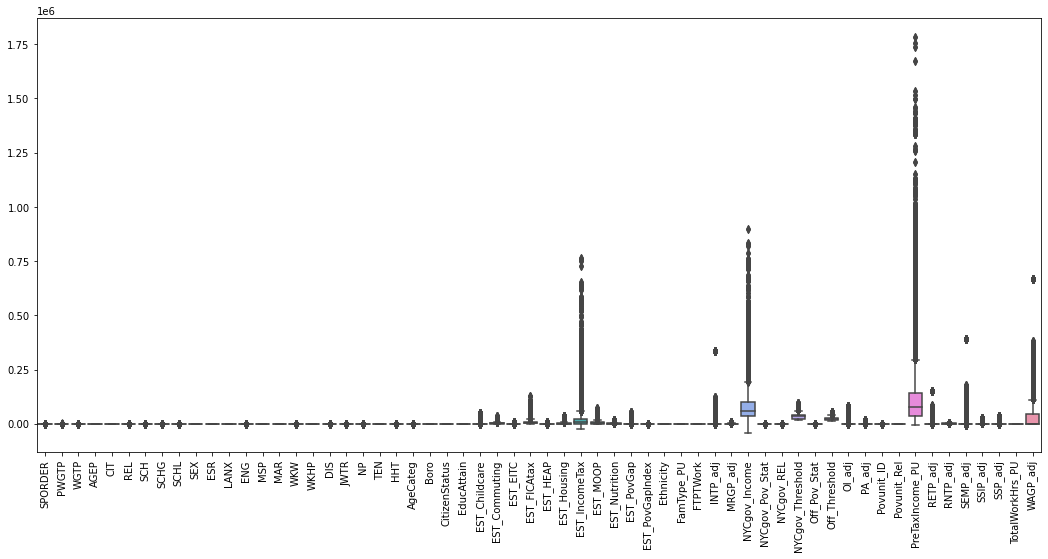

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para cada una de las columnas numéricas del dataset de pobreza
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.boxplot(data=pobreza)

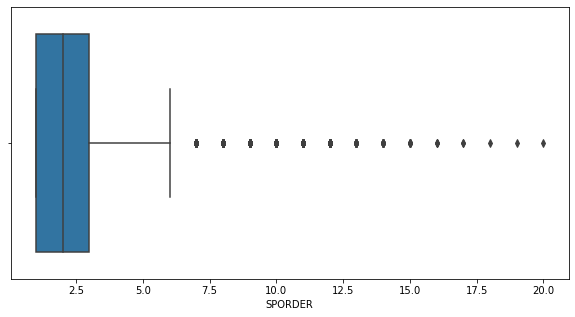

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SPORDER" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SPORDER'])

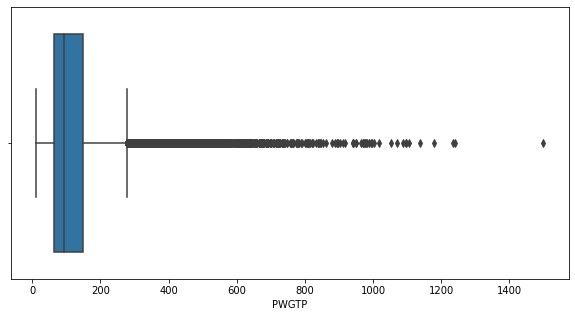

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "PWGTP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['PWGTP'])

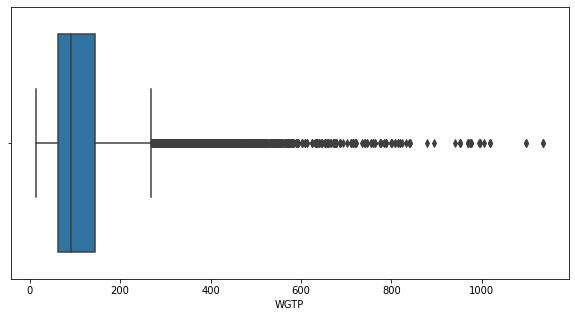

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "WGTP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['WGTP'])

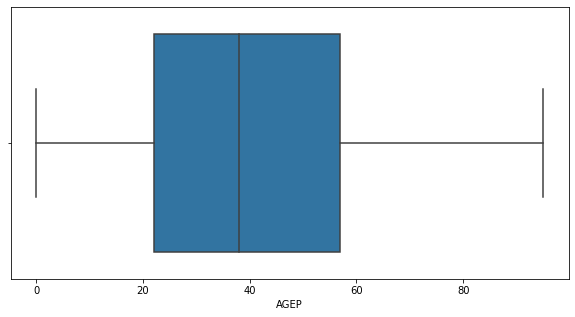

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "AGEP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['AGEP'])

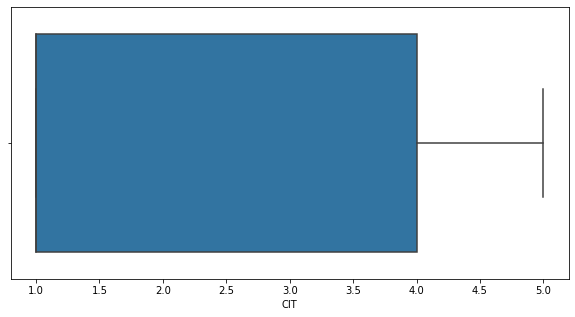

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "CIT" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['CIT'])

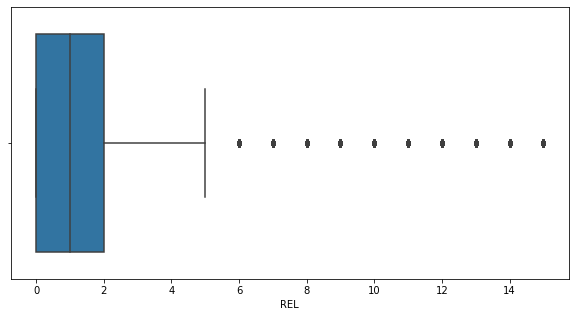

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "REL" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['REL'])

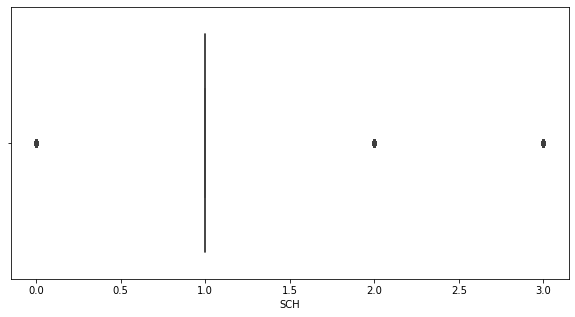

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SCH" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SCH'])

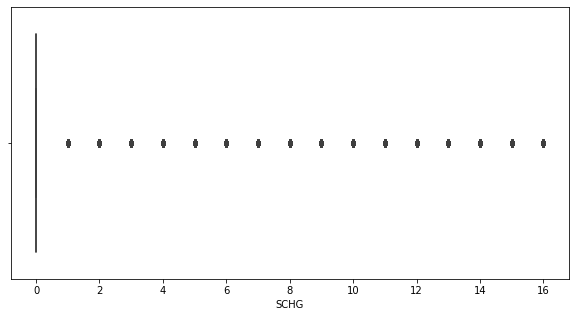

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SCHG" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SCHG'])

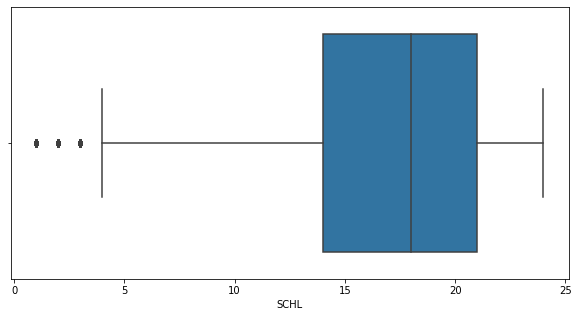

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SCHL" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SCHL'])

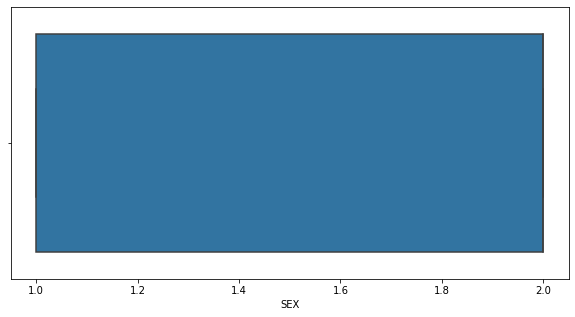

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SEX" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SEX'])

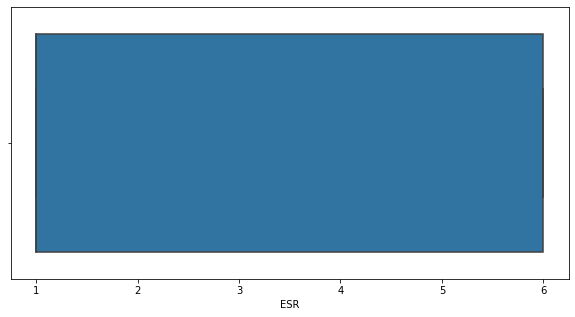

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "ESR" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['ESR'])

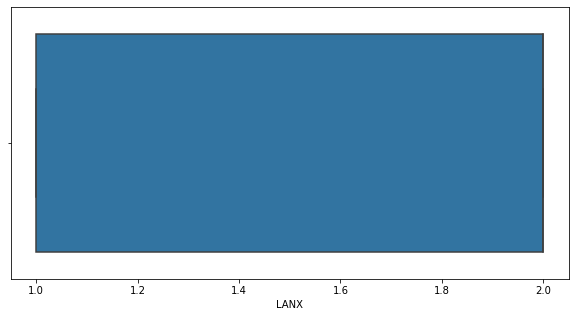

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "LANX" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['LANX'])

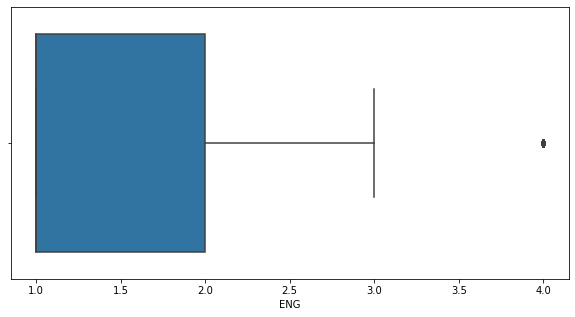

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "ENG" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['ENG'])

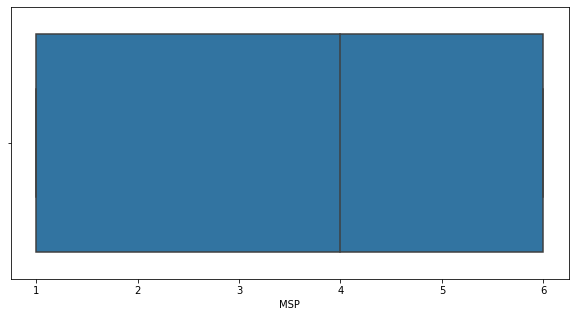

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "MSP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['MSP'])

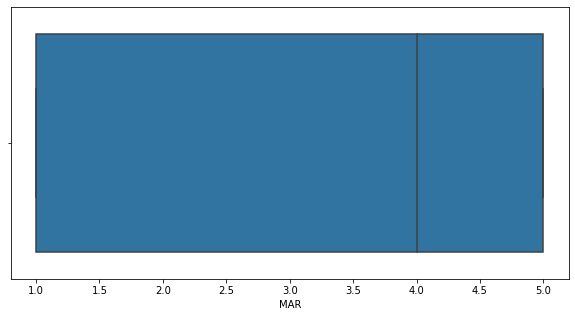

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "MAR" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['MAR'])

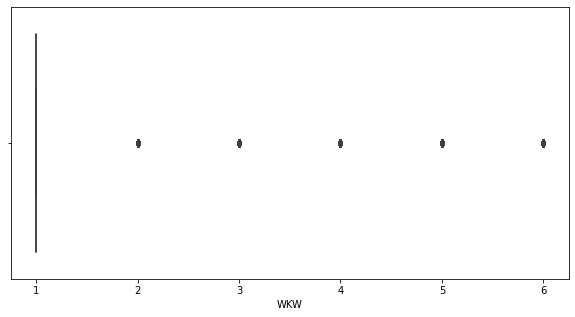

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "WKW" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['WKW'])

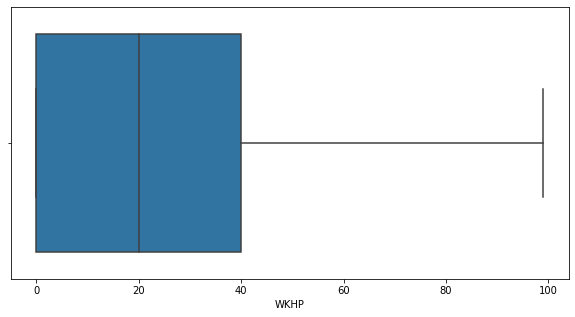

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "WKHP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['WKHP'])

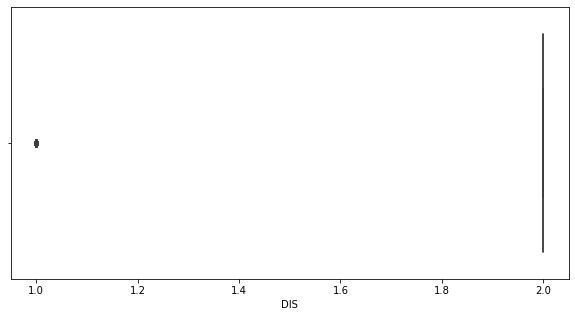

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "DIS" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['DIS'])

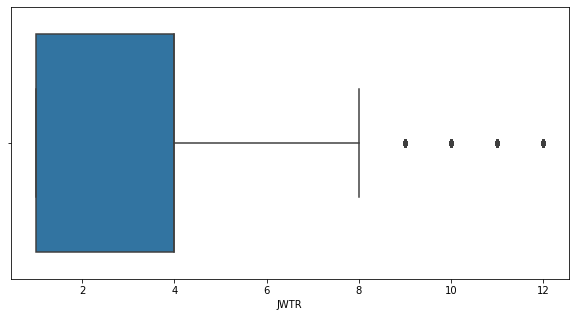

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "JWTR" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['JWTR'])

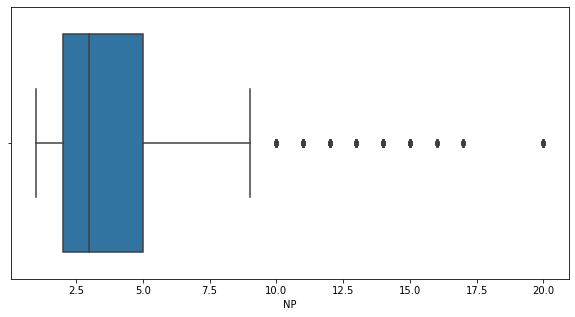

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "NP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['NP'])

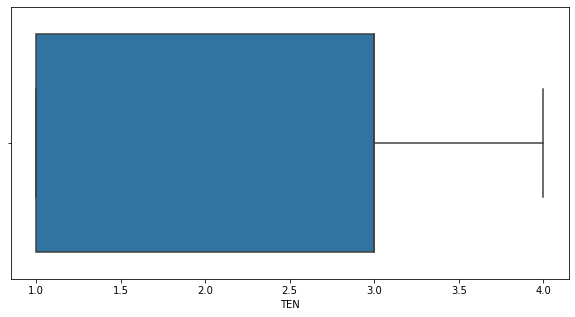

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "TEN" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['TEN'])

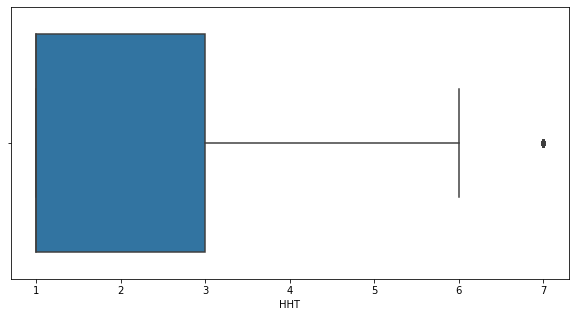

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "HHT" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['HHT'])

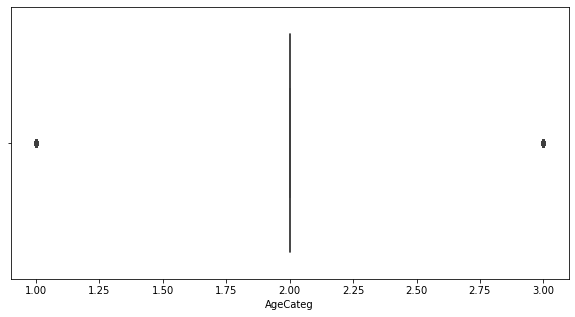

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "AgeCateg" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['AgeCateg'])

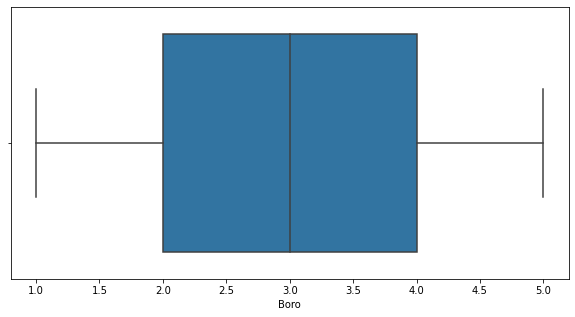

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Boro" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Boro'])

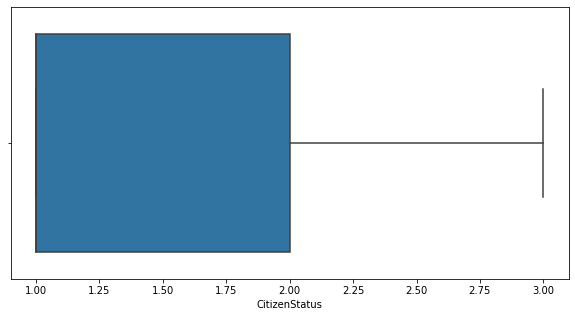

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "CitizenStatus" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['CitizenStatus'])

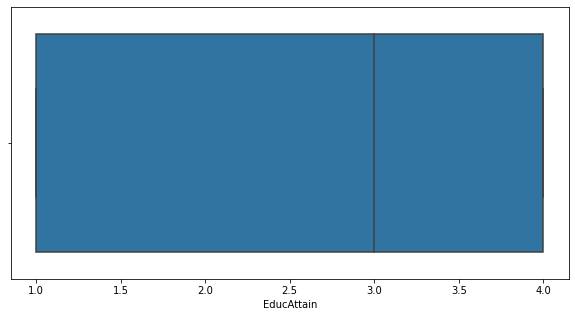

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EducAttain" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EducAttain'])

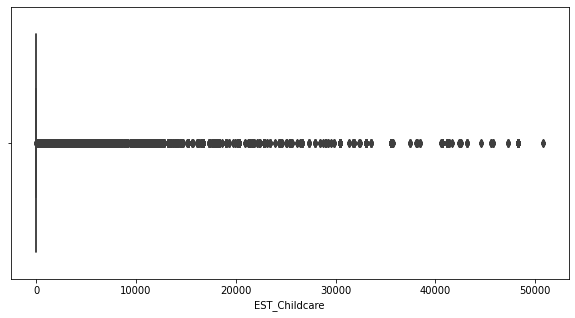

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_Childcare" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_Childcare'])

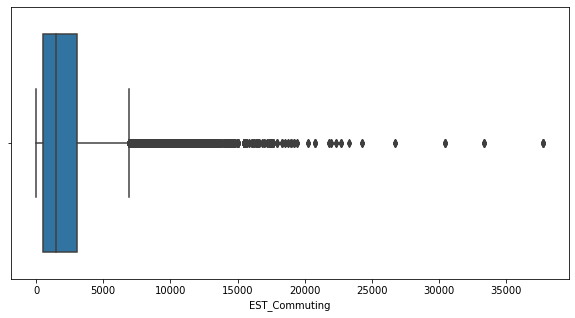

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_Commuting" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_Commuting'])

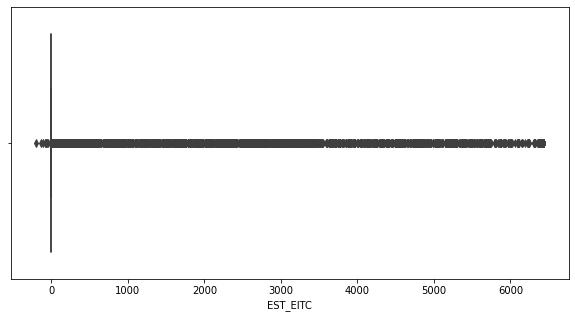

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_EITC" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_EITC'])

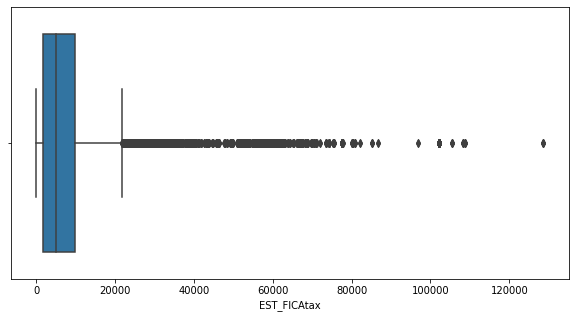

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_FICAtax" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_FICAtax'])

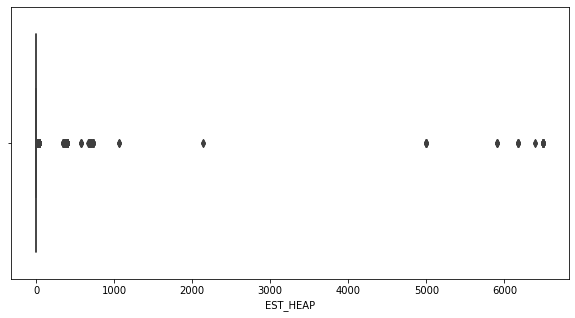

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_HEAP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_HEAP'])

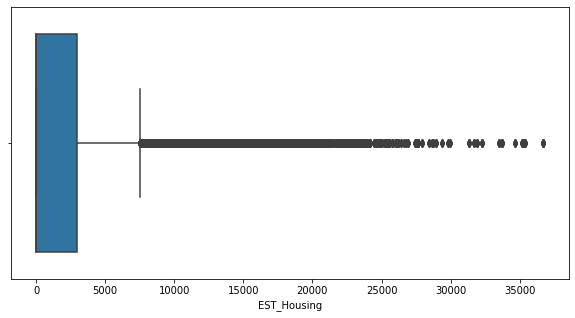

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_Housing" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_Housing'])

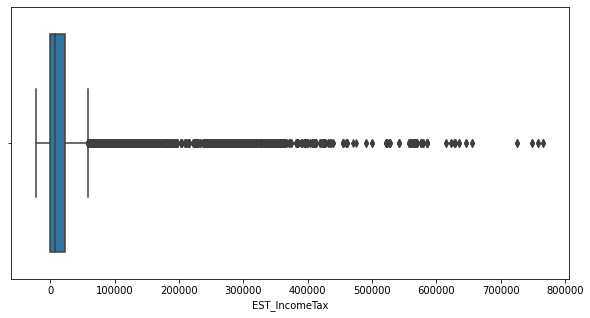

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_IncomeTax" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_IncomeTax'])

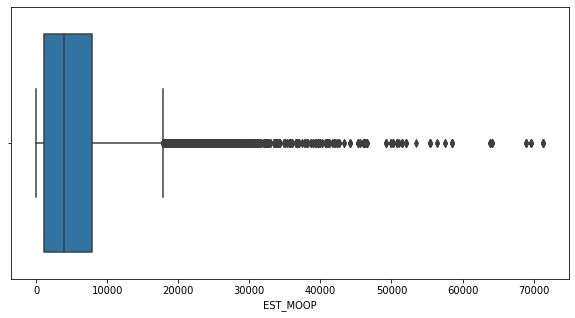

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_MOOP" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_MOOP'])

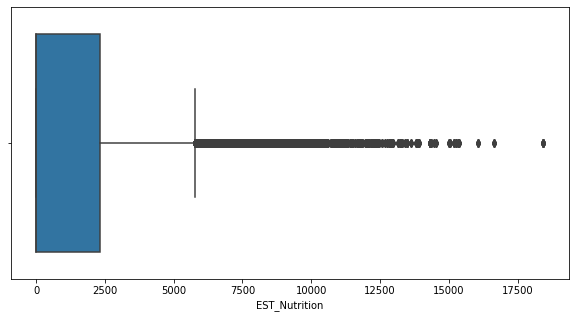

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_Nutrition" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_Nutrition'])

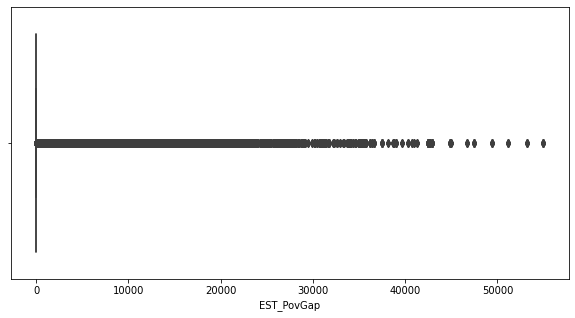

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_PovGap" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_PovGap'])

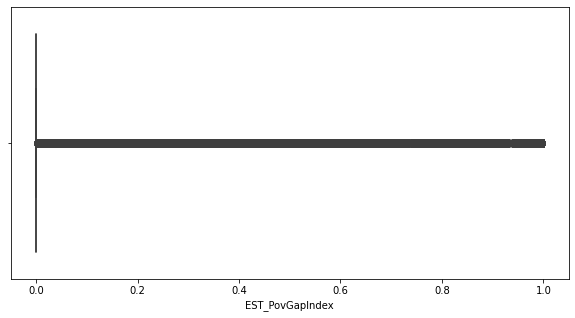

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "EST_PovGapIndex" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['EST_PovGapIndex'])

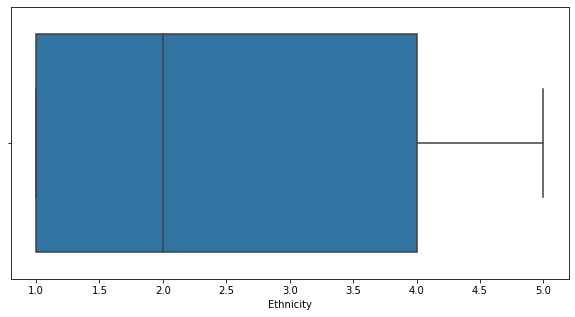

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Ethnicity" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Ethnicity'])

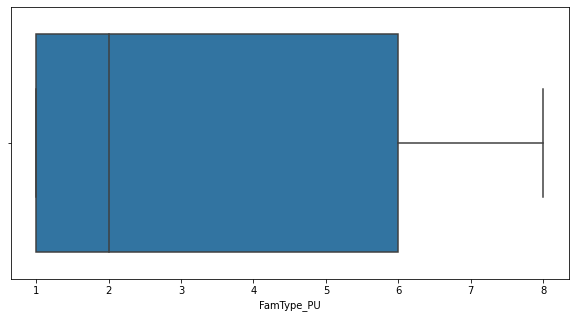

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "FamType_PU" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['FamType_PU'])

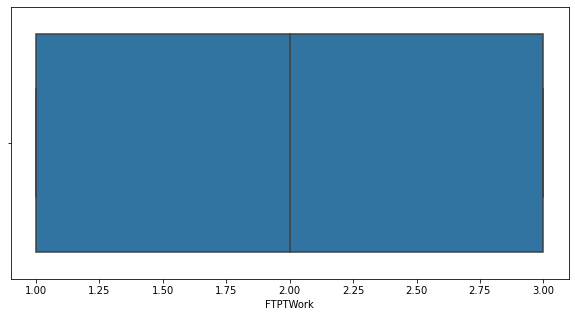

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "FTPTWork" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['FTPTWork'])

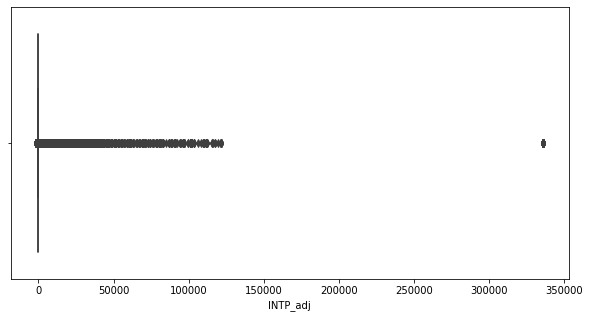

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "INTP_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['INTP_adj'])

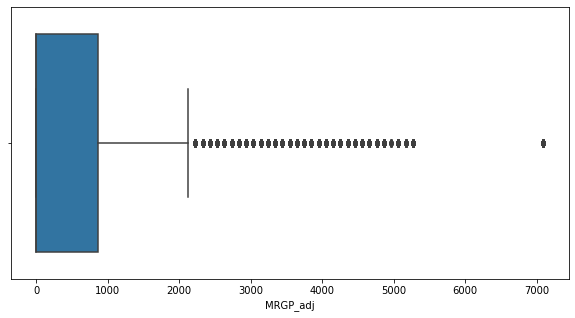

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "MRGP_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['MRGP_adj'])

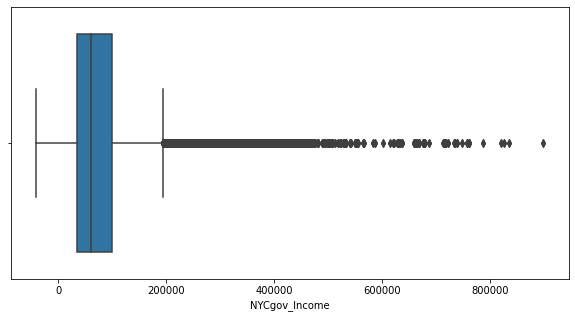

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "NYCgov_Income" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['NYCgov_Income'])

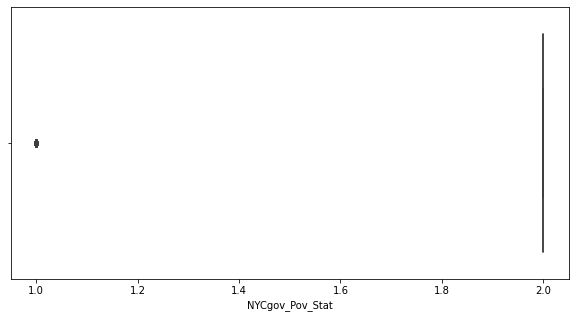

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "NYCgov_Pov_Stat" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['NYCgov_Pov_Stat'])

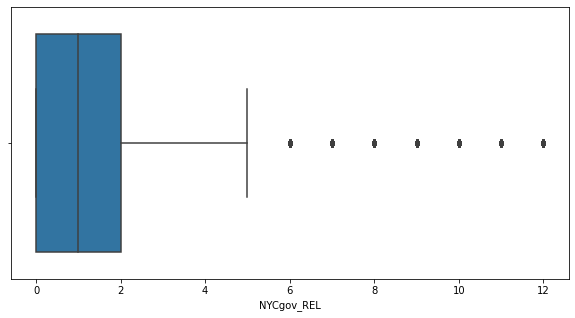

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "NYCgov_REL" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['NYCgov_REL'])

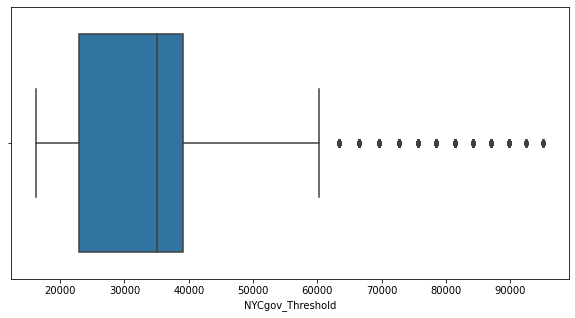

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "NYCgov_Threshold" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['NYCgov_Threshold'])

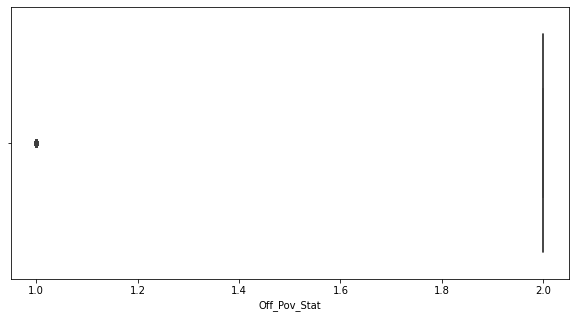

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Off_Pov_Stat" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Off_Pov_Stat'])

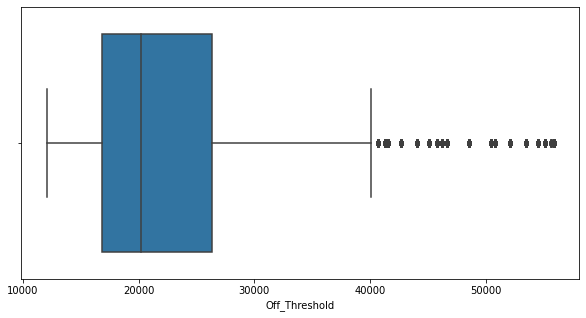

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Off_Threshold" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Off_Threshold'])

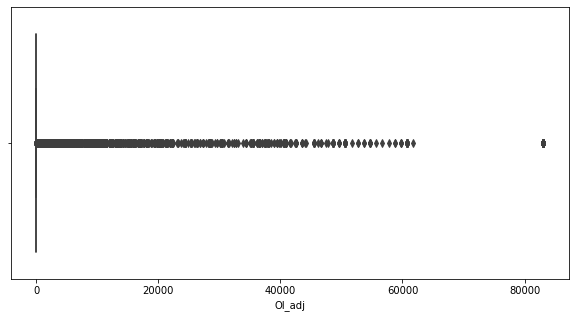

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "OI_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['OI_adj'])

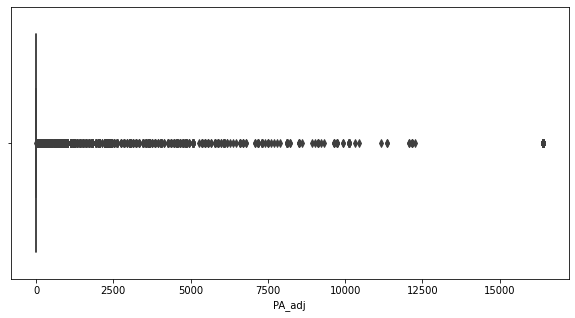

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "PA_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['PA_adj'])

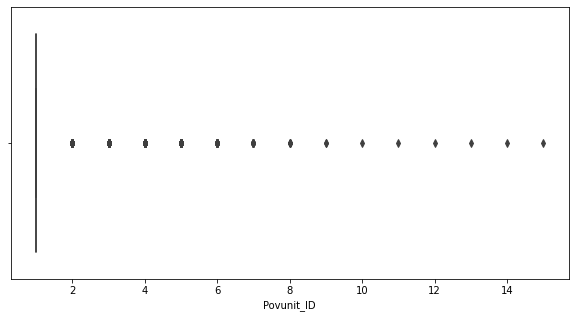

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Povunit_ID" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Povunit_ID'])

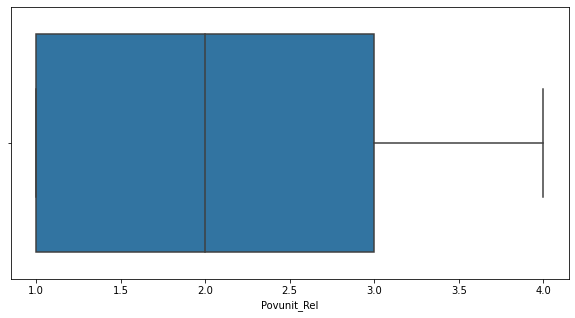

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Povunit_Rel" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['Povunit_Rel'])

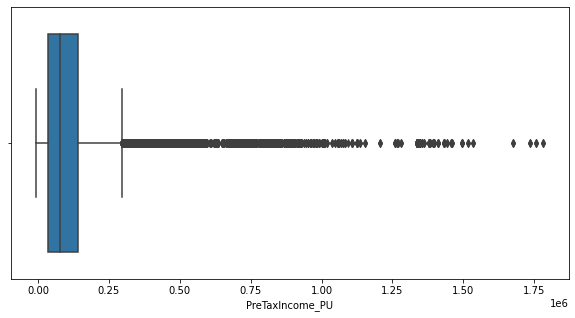

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "PreTaxIncome_PU" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['PreTaxIncome_PU'])

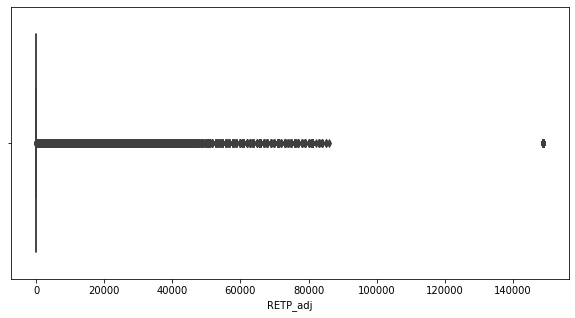

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "RETP_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['RETP_adj'])

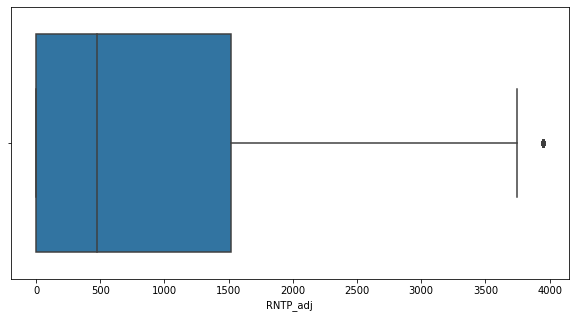

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "RNTP_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['RNTP_adj'])

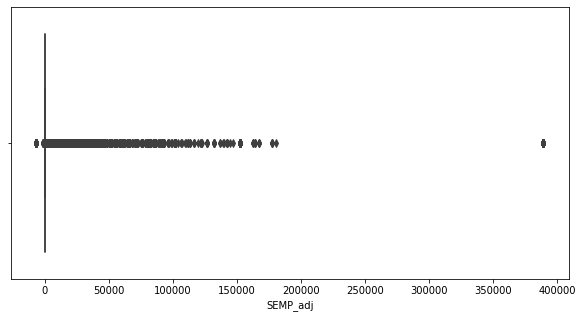

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "SEMP_adj" del dataset de pobreza
plt.figure(figsize=(10,5))
sns.boxplot(x=pobreza['SEMP_adj'])

In [ ]:
# Mostrar por columna de tipo numérico la canntidad de datos atípicos del dataset de pobreza
cols = pobreza.select_dtypes(exclude=['object'])
print("Columna => Cantidad datos atípicos")
print("----------------------------------")
for col in cols:
  print(col, " => ", count_outliers(pobreza, col))

Columna => Cantidad datos atípicos
----------------------------------
SPORDER  =>  500
PWGTP  =>  1505
WGTP  =>  1341
AGEP  =>  0
CIT  =>  0
REL  =>  7386
SCH  =>  18145
SCHG  =>  16038
SCHL  =>  0
SEX  =>  0
ESR  =>  0
LANX  =>  0
ENG  =>  0
MSP  =>  0
MAR  =>  0
WKW  =>  8499
WKHP  =>  0
DIS  =>  7345
JWTR  =>  252
NP  =>  277
TEN  =>  0
HHT  =>  0
AgeCateg  =>  24480
Boro  =>  0
CitizenStatus  =>  0
EducAttain  =>  0
EST_Childcare  =>  6930
EST_Commuting  =>  1846
EST_EITC  =>  4523
EST_FICAtax  =>  1950
EST_HEAP  =>  9730
EST_Housing  =>  7755
EST_IncomeTax  =>  3574
EST_MOOP  =>  1036
EST_Nutrition  =>  2459
EST_PovGap  =>  12113
EST_PovGapIndex  =>  12113
Ethnicity  =>  0
FamType_PU  =>  0
FTPTWork  =>  0
INTP_adj  =>  6626
MRGP_adj  =>  4660
NYCgov_Income  =>  2047
NYCgov_Pov_Stat  =>  12113
NYCgov_REL  =>  5013
NYCgov_Threshold  =>  194
Off_Pov_Stat  =>  9674
Off_Threshold  =>  1393
OI_adj  =>  1876
PA_adj  =>  1230
Povunit_ID  =>  3401
Povunit_Rel  =>  0
PreTaxIncome_PU  =>  2

In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
pobreza.memory_usage()

Index                 128
SPORDER            546184
PWGTP              546184
WGTP               546184
AGEP               546184
                    ...  
SEMP_adj           546184
SSIP_adj           546184
SSP_adj            546184
TotalWorkHrs_PU    546184
WAGP_adj           546184
Length: 61, dtype: int64

### Dataset accidentes

In [ ]:
# Conocer las dimensiones del dataframe accidentes
accidentes.shape

(3704406, 25)

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe accidentes
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704406 entries, 0 to 3704405
Data columns (total 25 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   UNIQUE_ID                    int64  
 1   COLLISION_ID                 int64  
 2   CRASH_DATE                   object 
 3   CRASH_TIME                   object 
 4   VEHICLE_ID                   object 
 5   STATE_REGISTRATION           object 
 6   VEHICLE_TYPE                 object 
 7   VEHICLE_MAKE                 object 
 8   VEHICLE_MODEL                object 
 9   VEHICLE_YEAR                 float64
 10  TRAVEL_DIRECTION             object 
 11  VEHICLE_OCCUPANTS            float64
 12  DRIVER_SEX                   object 
 13  DRIVER_LICENSE_STATUS        object 
 14  DRIVER_LICENSE_JURISDICTION  object 
 15  PRE_CRASH                    object 
 16  POINT_OF_IMPACT              object 
 17  VEHICLE_DAMAGE               object 
 18  VEHICLE_DAMAGE_1             object 
 19  

In [ ]:
# Visualizar los primeros 5 registros del dataset de accidentes
accidentes.head(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [ ]:
# Se verifica si se encuentran datos duplicados en el dataset de accidentes
accidentes[accidentes['UNIQUE_ID'].duplicated()==True]

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2


In [ ]:
# Eliminar los IDs para hacer un análisis de las columnas de tipo numérico
accidentes.drop(['UNIQUE_ID', 'COLLISION_ID'], axis=1, inplace=True)

In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset de accidentes
for col in accidentes:
  print(col+":\n", accidentes[col].value_counts())

CRASH_DATE:
 01/21/2014    2375
11/15/2018    2089
12/15/2017    2025
01/18/2015    2022
05/19/2017    1947
              ... 
04/19/2020     225
04/12/2020     223
04/23/2020     217
04/09/2020     211
04/05/2020     181
Name: CRASH_DATE, Length: 3444, dtype: int64
CRASH_TIME:
 16:00    53106
17:00    52004
15:00    51254
18:00    47734
14:00    47067
         ...  
3:34       158
5:31       158
3:32       158
4:02       148
3:31       140
Name: CRASH_TIME, Length: 1440, dtype: int64
VEHICLE_ID:
 1                                       769063
2                                       694884
3                                        50530
4                                        10398
5                                         2608
                                         ...  
430acdd8-23c1-4473-9390-e7bdc1691efe         1
0e529e0d-ca74-4373-8804-34b99f444653         1
ddd13a7d-f987-4ade-83d7-0e0cd7889e6e         1
d416ca94-42b8-4091-a552-f41f31966f56         1
93eac029-3d63-486f-b422-4a2

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset de accidentes
accidentes.describe(include=["object", "bool"])

,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,TRAVEL_DIRECTION,DRIVER_SEX,DRIVER_LICENSE_STATUS,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
count,3704406,3704406,3704406,3487358,3526581,1918899,51374,2069995,1654120,1586397,...,2821806,2042389,2025367,1287487,957886,728256,2175543,19342,3586603,2053718
unique,3444,1440,2175578,82,2142,10267,2429,15,3,3,...,19,19,19,19,19,19,3,14595,61,56
top,01/21/2014,16:00,1,NY,Sedan,TOYT -CAR/SUV,TOYT CAM,West,M,Licensed,...,Going Straight Ahead,Center Front End,Center Front End,No Damage,No Damage,No Damage,N,FENCE,Unspecified,Unspecified
freq,2375,53106,769063,2923340,859697,334287,3030,477593,1220441,1546893,...,1369802,335720,301325,351426,457597,527859,1923166,624,2131906,1628200


In [ ]:
# Se agrupan los accidentes por fecha y se muestra un ejemplo de los accidentes que ocurrieron el 01/01/2013
crash_by_dates = accidentes.groupby(by='CRASH_DATE')
# crash_by_dates.first()
crash_by_dates.get_group('01/01/2013')

,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
8604,01/01/2013,16:00,2,NY,UNKNOWN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
9718,01/01/2013,20:00,2,NY,LIVERY VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsafe Speed,NaN
11466,01/01/2013,11:18,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
12553,01/01/2013,6:00,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
13375,01/01/2013,7:50,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure to Keep Right,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893038,01/01/2013,22:00,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1894371,01/01/2013,17:38,2,NY,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1900369,01/01/2013,18:15,2,NY,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1902094,01/01/2013,1:16,2,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN


In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
accidentes.memory_usage()

Index                               128
CRASH_DATE                     29635248
CRASH_TIME                     29635248
VEHICLE_ID                     29635248
STATE_REGISTRATION             29635248
VEHICLE_TYPE                   29635248
VEHICLE_MAKE                   29635248
VEHICLE_MODEL                  29635248
VEHICLE_YEAR                   29635248
TRAVEL_DIRECTION               29635248
VEHICLE_OCCUPANTS              29635248
DRIVER_SEX                     29635248
DRIVER_LICENSE_STATUS          29635248
DRIVER_LICENSE_JURISDICTION    29635248
PRE_CRASH                      29635248
POINT_OF_IMPACT                29635248
VEHICLE_DAMAGE                 29635248
VEHICLE_DAMAGE_1               29635248
VEHICLE_DAMAGE_2               29635248
VEHICLE_DAMAGE_3               29635248
PUBLIC_PROPERTY_DAMAGE         29635248
PUBLIC_PROPERTY_DAMAGE_TYPE    29635248
CONTRIBUTING_FACTOR_1          29635248
CONTRIBUTING_FACTOR_2          29635248
dtype: int64

### Dataset educación

In [ ]:
# Conocer las dimensiones del dataframe educación
educacion.shape

(519, 10)

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe educación
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 10 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   School DBN                                                                              519 non-null    object
 1   Community School District                                                               519 non-null    int64 
 2   City Council District                                                                   519 non-null    int64 
 3   School Name                                                                             519 non-null    object
 4   # of students in grades 9-12                                                            519 non-null    int64 
 5   # of students in grades 9-12 scheduled for at least one semester of health ins

In [ ]:
# Visualizar los primeros 5 registros del dataset de educación
educacion.head(5)

,School DBN,Community School District,City Council District,School Name,# of students in grades 9-12,# of students in grades 9-12 scheduled for at least one semester of health instruction,%,# of 16-17 June and August graduates,# of 16-17 June and August graduates meeting high school health requirements,% 1
0,02M394,2,1,Emma Lazarus High School,306,218,71.2%,33,33,100.0%
1,02M551,2,1,Urban Assembly New York Harbor School,433,419,96.8%,70,70,100.0%
2,02M294,2,1,Essex Street Academy,328,239,72.9%,69,69,100.0%
3,01M458,1,1,Forsyth Satellite Academy,161,144,89.4%,s,s,s
4,02M280,2,1,Manhattan Early College School for Advertising,267,103,38.6%,s,s,s


In [ ]:
# Hacer un cambio del tipo de dato para las columnas que lo requieren y así hacer un análisis de las columnas numéricas
educacion[["# of students in grades 9-12 scheduled for at least one semester of health instruction", "# of 16-17 June and August graduates", "# of 16-17 June and August graduates meeting high school health requirements"]] = educacion[["# of students in grades 9-12 scheduled for at least one semester of health instruction", "# of 16-17 June and August graduates", "# of 16-17 June and August graduates meeting high school health requirements"]].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset de educación
for col in educacion:
  print(col+":\n", educacion[col].value_counts())

School DBN:
 02M394    1
14K477    1
16K393    1
13K595    1
75K373    1
         ..
01M539    1
02M420    1
02M260    1
75M226    1
75M138    1
Name: School DBN, Length: 519, dtype: int64
Community School District:
 2     70
75    41
10    29
9     24
8     21
17    19
7     18
11    17
28    16
12    16
13    16
19    15
3     15
27    15
18    14
14    14
15    14
24    13
25    12
21    12
29    11
6     11
31    11
5     10
30    10
1      9
32     8
16     7
23     7
4      7
22     6
26     6
20     5
Name: Community School District, dtype: int64
City Council District:
 3     30
1     25
17    24
33    23
16    21
2     21
8     17
26    17
11    17
15    16
18    15
24    15
37    14
12    13
13    13
36    12
35    12
9     12
6     11
47    11
40    10
46    10
42    10
10     9
48     9
34     9
41     9
27     8
28     8
23     8
20     8
31     7
39     7
5      6
32     6
49     5
51     5
29     5
7      5
4      4
38     4
45     4
50     4
14     4
25     4
43     3
44

In [ ]:
# Eliminar IDs para el análisis de las columnas numéricas del dataset de educacion
educacion.drop(['Community School District','City Council District'], axis=1, inplace=True)

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset de educación
educacion.describe()

,# of students in grades 9-12,# of students in grades 9-12 scheduled for at least one semester of health instruction,# of 16-17 June and August graduates,# of 16-17 June and August graduates meeting high school health requirements
count,519.000000,439.000000,420.000000,417.000000
mean,556.009634,272.059226,126.619048,126.992806
std,699.568809,155.199168,153.953291,154.161137
min,11.000000,11.000000,10.000000,10.000000
25%,272.000000,161.000000,58.000000,58.000000
50%,378.000000,252.000000,79.000000,79.000000
75%,481.500000,353.000000,108.000000,108.000000
max,5629.000000,841.000000,938.000000,938.000000


In [ ]:
# Visualizar la matriz de correlación de los atributos numméricos del dataset de educación
corr = educacion.corr()
corr.style.background_gradient(cmap="coolwarm") # Se selecciona un gradiente para identificar más fácilmente la correlación entre columnas

,# of students in grades 9-12,# of students in grades 9-12 scheduled for at least one semester of health instruction,# of 16-17 June and August graduates,# of 16-17 June and August graduates meeting high school health requirements
# of students in grades 9-12,1.000000,0.714804,0.986272,0.986162
# of students in grades 9-12 scheduled for at least one semester of health instruction,0.714804,1.000000,0.699468,0.699743
# of 16-17 June and August graduates,0.986272,0.699468,1.000000,0.999953
# of 16-17 June and August graduates meeting high school health requirements,0.986162,0.699743,0.999953,1.000000


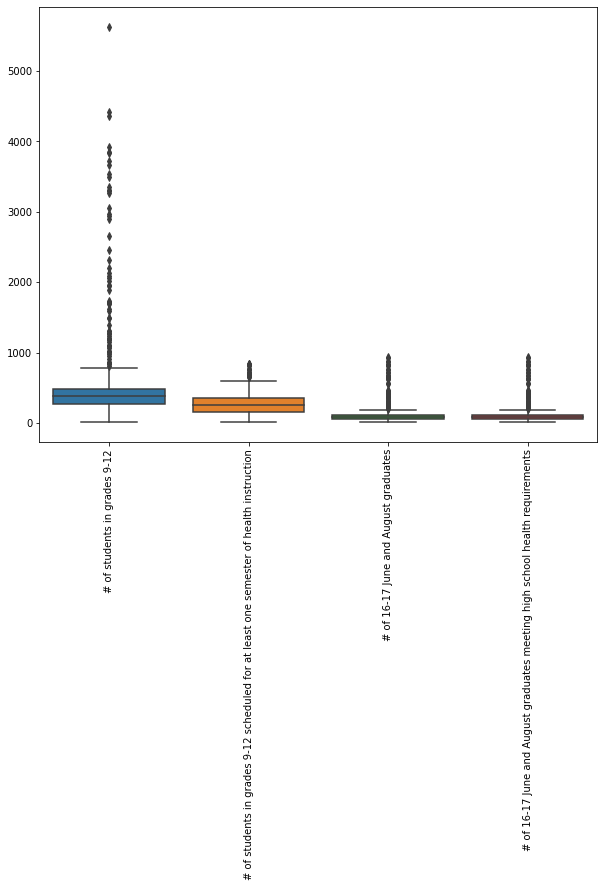

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para cada una de las columnas numéricas del dataset de educación
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.boxplot(data=educacion)

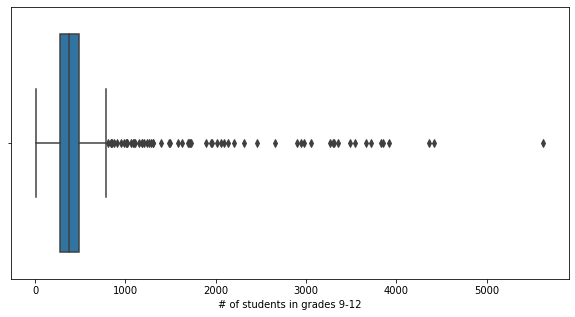

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "# of students in grades 9-12" del dataset de educación
plt.figure(figsize=(10,5))
sns.boxplot(x=educacion['# of students in grades 9-12'])

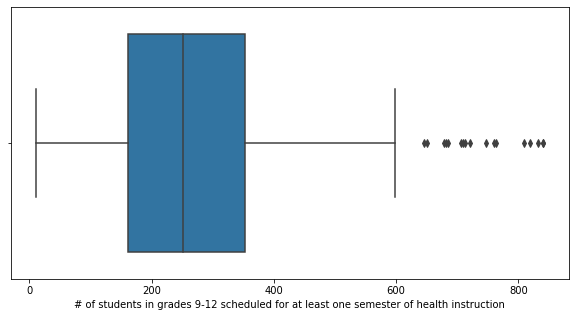

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "# of students in grades 9-12  scheduled for at least one semester of health instruction" del dataset de educación
plt.figure(figsize=(10,5))
sns.boxplot(x=educacion['# of students in grades 9-12 scheduled for at least one semester of health instruction'])

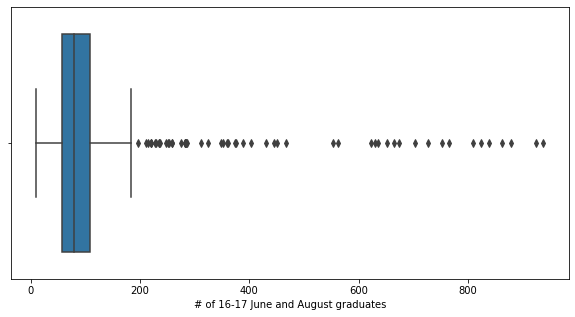

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "# of 16-17 June and August graduates" del dataset de educación
plt.figure(figsize=(10,5))
sns.boxplot(x=educacion['# of 16-17 June and August graduates'])

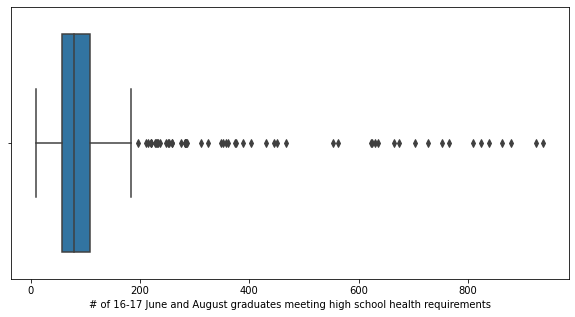

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "# of 16-17 June and August graduates  meeting high school health requirements" del dataset de educación
plt.figure(figsize=(10,5))
sns.boxplot(x=educacion['# of 16-17 June and August graduates meeting high school health requirements'])

In [ ]:
# Mostrar por columna de tipo numérico la canntidad de datos atípicos del dataset de educación
cols = educacion.select_dtypes(exclude=['object'])
print("Columna => Cantidad datos atípicos")
print("----------------------------------")
for col in cols:
  print(col, " => ", count_outliers(educacion, col))

Columna => Cantidad datos atípicos
----------------------------------
# of students in grades 9-12  =>  54
# of students in grades 9-12 scheduled for at least one semester of health instruction  =>  2
# of 16-17 June and August graduates  =>  48
# of 16-17 June and August graduates meeting high school health requirements  =>  46


In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
educacion.memory_usage()

Index                                                                                      128
School DBN                                                                                4152
School Name                                                                               4152
# of students in grades 9-12                                                              4152
# of students in grades 9-12 scheduled for at least one semester of health instruction    4152
%                                                                                         4152
# of 16-17 June and August graduates                                                      4152
# of 16-17 June and August graduates meeting high school health requirements              4152
% 1                                                                                       4152
dtype: int64

### Dataset calidad del aire

In [ ]:
# Conocer las dimensiones del dataframe de calidad de aire
calidadAire.shape

(16122, 12)

In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
calidadAire.memory_usage()

Index                128
Unique ID         128976
Indicator ID      128976
Name              128976
Measure           128976
Measure Info      128976
Geo Type Name     128976
Geo Join ID       128976
Geo Place Name    128976
Time Period       128976
Start_Date        128976
Data Value        128976
Message           128976
dtype: int64

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe de calidad de aire
calidadAire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [ ]:
# Visualizar los primeros 5 registros del dataset de calidad del aire
calidadAire.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


In [ ]:
# Se verifica si se encuentran datos duplicados en el dataset de calidad de aire
calidadAire[calidadAire['Unique ID'].duplicated() == True]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message


In [ ]:
# Eliminar los IDs para hacer un análisis de las columnas de tipo numérico
calidadAire.drop(['Unique ID', 'Indicator ID',  'Geo Join ID', 'Message'], axis=1, inplace=True)

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset de calidad de aire
calidadAire.describe(include='object')

,Name,Measure,Measure Info,Geo Type Name,Geo Place Name,Time Period,Start_Date
count,16122,16122,16122,16122,16122,16122,16122
unique,19,8,8,5,114,45,36
top,Fine Particulate Matter (PM2.5),Mean,ppb,UHF42,Long Island City - Astoria,2012-2014,01/01/2015
freq,5076,12972,7896,6216,240,480,906


In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset de calidad del aire
for col in calidadAire:
  print(col+":\n", calidadAire[col].value_counts(), "\n")

Name:
 Fine Particulate Matter (PM2.5)                                                 5076
Nitrogen Dioxide (NO2)                                                          5076
Ozone (O3)                                                                      1692
Sulfur Dioxide (SO2)                                                            1128
PM2.5-Attributable Asthma Emergency Department Visits                            384
O3-Attributable Asthma Emergency Department Visits                               384
O3-Attributable Asthma Hospitalizations                                          384
Traffic Density- Annual Vehicle Miles Traveled for Cars                          214
Traffic Density- Annual Vehicle Miles Traveled                                   209
Traffic Density- Annual Vehicle Miles Traveled for Trucks                        209
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)     192
O3-Attributable Cardiac and Respiratory Deaths            

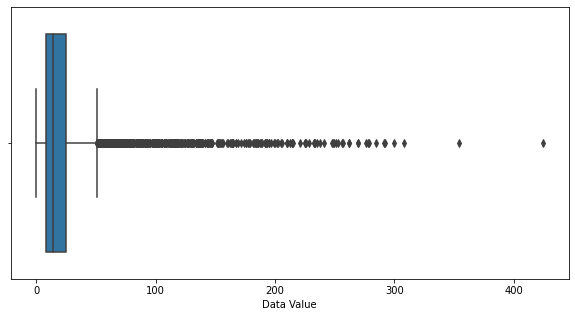

In [ ]:
# Mostrar en una gráfica el diagrama de caja y bigotes para la columna "Data Value" del dataset de calidad del aire
plt.figure(figsize=(10,5))
sns.boxplot(x=calidadAire['Data Value'])

In [ ]:
# Mostrar por columna de tipo numérico la canntidad de datos atípicos del dataset de calidad del aire
cols = calidadAire.select_dtypes(exclude=['object'])
print("Columna => Cantidad datos atípicos")
print("----------------------------------")
for col in cols:
  print(col, " => ", count_outliers(calidadAire, col))

Columna => Cantidad datos atípicos
----------------------------------
Data Value  =>  360
